220500
220500


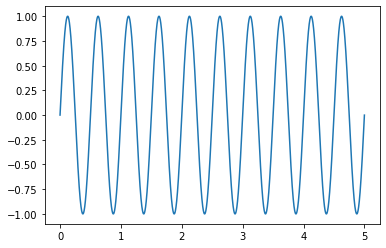

In [2]:
import numpy as np
#library for plotting
from matplotlib import pyplot as plt
'''
SAMPLE_RATE determines how many data points the signal uses to represent the sine wave per second. 
So if the signal had a sample rate of 10 Hz and was a five-second sine wave, then it would have 10 * 5 = 50 data points.
'''
SAMPLE_RATE = 44100 
#How much time the signal will be captured
DURATION = 5  # Seconds

#This function is for generating sine wave 
def generate_sine_wave(freq, sample_rate, duration):
     #linspace(start,end,num_of_datapoint,whether_endpoint_included_or_not)
      #Return evenly spaced numbers over a specified interval.
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    
    #value of f*t different point of t has been found in the array frequencies
    frequencies = x * freq

    # 2pi because np.sin takes radians
    #sin(wt)=>sin2*pi*f*t
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)

print(len(x)) # 44100*5=220500
print(len(y)) 
plt.plot(x, y)


[ 0.          0.0569595   0.11373405 ... -0.1701393  -0.11373405
 -0.0569595 ]
[ 0.          0.16186522  0.27256585 ... -0.29711009 -0.27256585
 -0.16186522]
220500


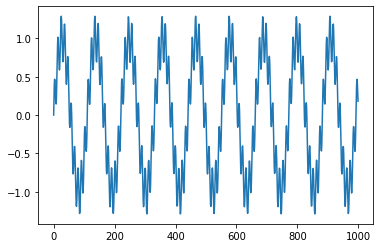

In [3]:
#Mixing Audio Signals
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3
print(nice_tone)
print(noise_tone)
mixed_tone = nice_tone + noise_tone
print(len(mixed_tone))
plt.plot(mixed_tone[:1000])
plt.show()

In [4]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
#The signal is saved as mysinewave.wav
write("mysinewave.wav", SAMPLE_RATE,mixed_tone)

220500


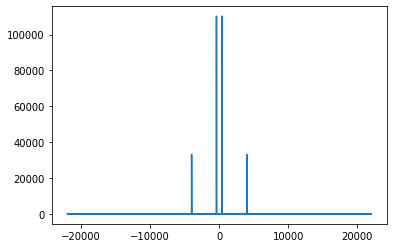

In [5]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION
print(N)
yf = fft(mixed_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

You can see two peaks in the positive frequencies and mirrors of those peaks in the negative frequencies.
The positive-frequency peaks are at 400 Hz and 4000 Hz, which corresponds to the frequencies that you put into the audio.
The Fourier transform has taken your complicated, wibbly signal and turned it into just the frequencies it contains.
Since you put in only two frequencies, only two frequencies have come out. 